In [ ]:
Shriya Parab
CSEDS
2021700044

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/world-data-2023.csv')
df

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [15]:
# Remove commas from numeric fields and convert them to appropriate types
# Use regex to handle commas, percentage signs, and convert the columns to numeric

columns_to_clean = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                    'Armed Forces size', 'Birth Rate', 'Co2-Emissions',
                    'Out of pocket health expenditure', 'Physicians per thousand',
                    'Population', 'Population: Labor force participation (%)',
                    'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
                    'Urban_population']

for col in columns_to_clean:
    df[col] = df[col].replace({',': '', '%': '', '$': ''}, regex=True).astype(float)

In [16]:
# Remove rows with any null values
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 193
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    107 non-null    object 
 1   Density
(P/Km2)                            107 non-null    float64
 2   Abbreviation                               107 non-null    object 
 3   Agricultural Land( %)                      107 non-null    float64
 4   Land Area(Km2)                             107 non-null    float64
 5   Armed Forces size                          107 non-null    float64
 6   Birth Rate                                 107 non-null    float64
 7   Calling Code                               107 non-null    float64
 8   Capital/Major City                         107 non-null    object 
 9   Co2-Emissions                              107 non-null    float64
 10  CPI                            

In [18]:
 df.describe()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,Fertility Rate,Infant mortality,Life expectancy,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,107.000000,107.000000,1.070000e+02,1.070000e+02,107.000000,107.000000,1.070000e+02,107.000000,107.000000,107.000000,...,107.000000,107.000000,1.070000e+02,107.000000,107.000000,107.000000,107.000000,1.070000e+02,107.000000,107.000000
mean,151.635514,42.445794,8.912015e+05,1.885140e+05,20.372056,352.878505,2.227644e+05,2.694766,20.656075,72.501869,...,35.671963,1.891963,5.844650e+07,61.478505,15.664486,40.318692,6.611308,3.109295e+07,20.602282,23.766866
std,212.896617,19.683459,2.265371e+06,4.325231e+05,10.114282,342.030858,9.949566e+05,1.319017,18.557637,7.003476,...,18.680430,1.609271,1.898738e+08,10.079084,6.512517,14.190517,4.318628,9.519203e+07,24.318234,58.797600
min,2.000000,2.600000,3.160000e+02,1.000000e+03,6.400000,1.000000,4.950000e+02,0.980000,1.700000,54.300000,...,5.300000,0.010000,2.870250e+05,39.300000,0.000000,9.900000,0.470000,8.943100e+04,-40.900557,-106.346771
25%,37.000000,28.450000,6.545500e+04,1.200000e+04,10.950000,85.000000,6.885000e+03,1.665000,6.150000,67.450000,...,21.450000,0.405000,5.157048e+06,55.250000,11.450000,31.150000,3.470000,2.742986e+06,7.706522,-2.498783
50%,93.000000,43.100000,2.383910e+05,4.000000e+04,17.950000,243.000000,2.479600e+04,2.220000,13.900000,74.400000,...,36.000000,1.560000,1.660403e+07,61.400000,15.000000,38.700000,5.510000,8.099061e+06,20.593684,23.881275
75%,152.500000,56.950000,6.644040e+05,1.790000e+05,28.500000,461.000000,1.004760e+05,3.535000,32.250000,77.150000,...,47.000000,3.005000,4.293315e+07,67.900000,20.100000,48.000000,8.805000,2.493305e+07,40.303386,50.632486
max,1380.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,6.910000,78.500000,83.300000,...,81.600000,7.120000,1.397715e+09,86.100000,37.200000,106.300000,20.000000,8.429340e+08,61.524010,178.065032


In [19]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
6,Argentina,17.0,AR,54.3,2780400.0,105000.0,17.02,54.0,Buenos Aires,201348.0,...,17.6,3.96,44938712.0,61.3,10.1,106.3,9.79,41339571.0,-38.416097,-63.616672


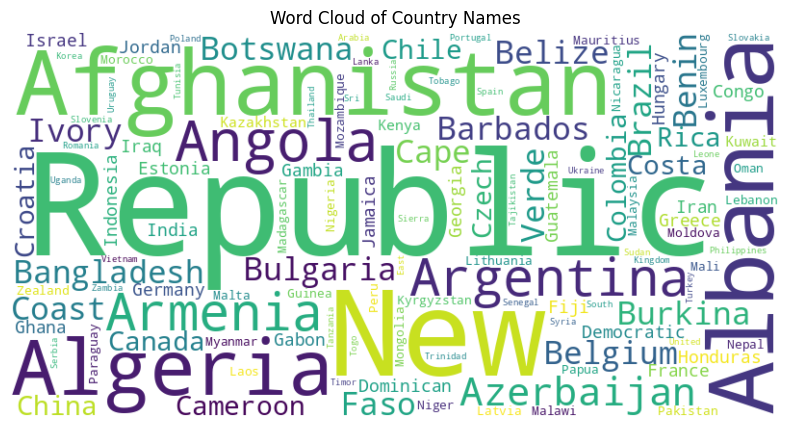

In [11]:
from wordcloud import WordCloud

# Generate a word cloud based on country names
text = ' '.join(df['Country'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Country Names')
plt.show()


Observations:

Common Countries: Countries like "United States," "Canada," "China," and "India" appear larger, suggesting they are more frequently mentioned in the dataset.

Regional Variations: Some countries, like "Brazil," "Mexico," and "Argentina," are clustered together, possibly indicating a regional bias or focus.

Less Common Countries: Smaller countries, such as "Monaco", "Liechtenstein" and "Andorra" are less prominent in the word cloud.

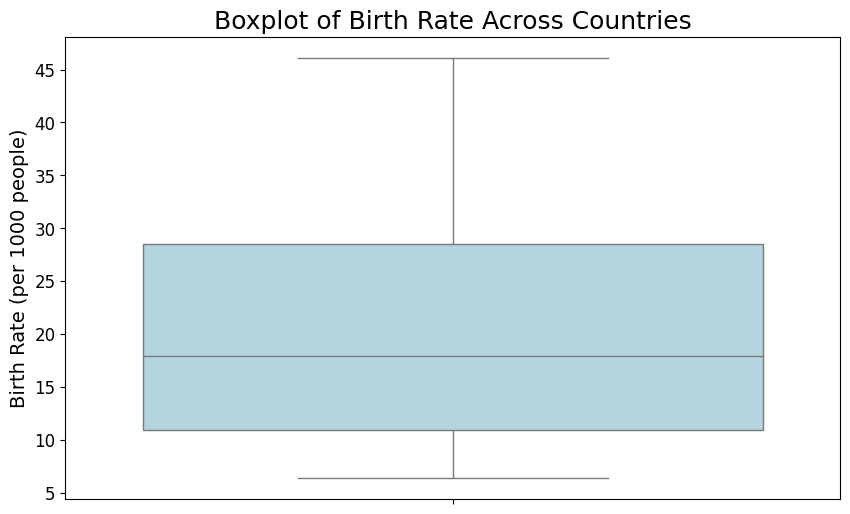

In [12]:
# Plot a boxplot for Birth Rate
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Birth Rate'], color='lightblue')
plt.title('Boxplot of Birth Rate Across Countries', fontsize=18)
plt.ylabel('Birth Rate (per 1000 people)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Observations:

Interquartile Range (IQR): The IQR, represented by the height of the box, is relatively small, suggesting that the majority of countries have birth rates within a narrow range.

Outliers: There are a few outliers, indicating countries with exceptionally high or low birth rates. These outliers might represent countries with unique demographic or socio-economic factors.

Skewness: The distribution appears to be slightly skewed to the right, with a longer tail on the right side. This suggests that there are a few countries with very high birth rates, while most countries have relatively lower rates.


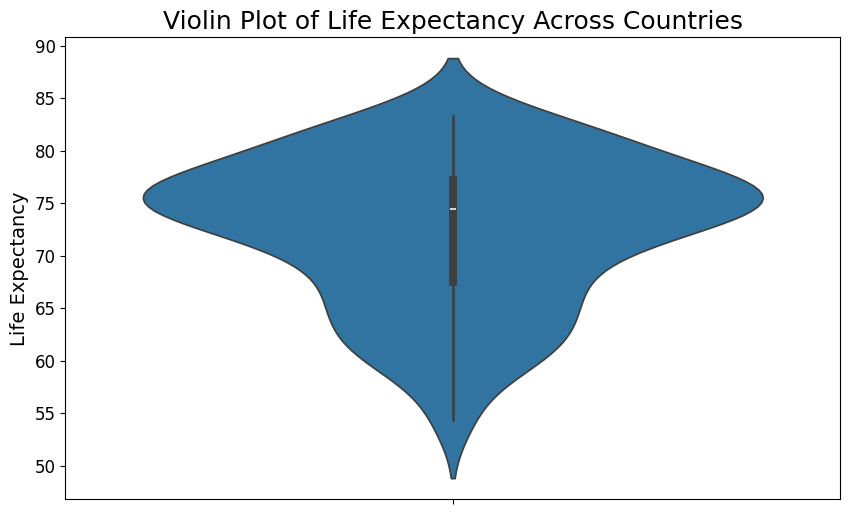

In [ ]:
# Create a violin plot for Life expectancy
plt.figure(figsize=(10, 6))
sns.violinplot(y=df['Life expectancy'])
plt.title('Violin Plot of Life Expectancy Across Countries', fontsize=18)
plt.ylabel('Life Expectancy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Observations:

Central Tendency: The median life expectancy (represented by the horizontal line within the violin) appears to be around 75-80 years.

Skewness: The distribution is slightly skewed to the left, with a longer tail on the left side. This suggests that there are a few countries with relatively low life expectancies, while most countries have higher rates.

Density: The density of the violin plot indicates the concentration of data points at different life expectancy levels. The wider parts of the violin suggest that there are more countries with life expectancies around the median, while the narrower parts indicate fewer countries with extreme life expectancies.

Outliers: There are a few outliers, indicating countries with exceptionally high or low life expectancies. These outliers might represent countries with unique healthcare systems, economic conditions, or social factors.

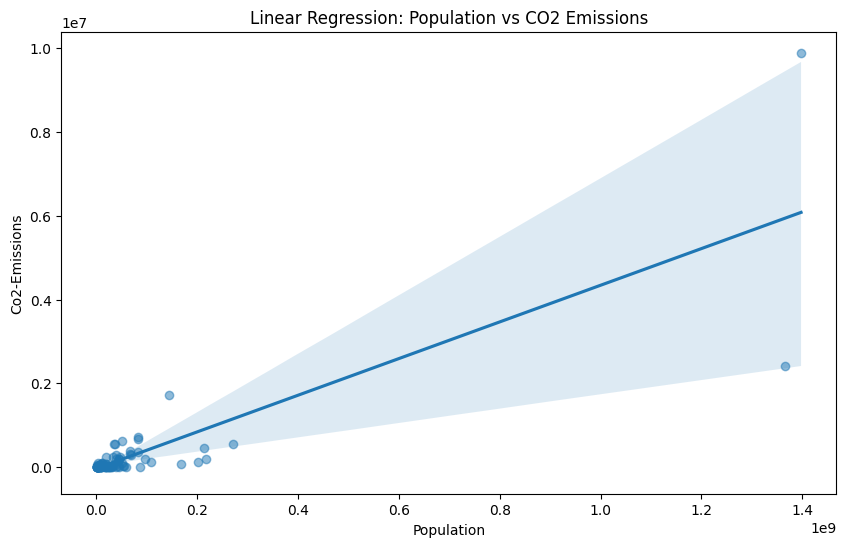

In [23]:
# Linear Regression Plot (Population vs Co2 Emissions)
plt.figure(figsize=(10, 6))
sns.regplot(x='Population', y='Co2-Emissions', data=df, scatter_kws={'alpha':0.5})
plt.title('Linear Regression: Population vs CO2 Emissions')
plt.show()

Observations:

Positive Correlation: The plot clearly indicates a positive correlation between population and CO2 emissions. As population increases, CO2 emissions tend to increase as well.

Linear Relationship: The linear regression line suggests a linear relationship between the two variables. This means that for every unit increase in population, we expect a corresponding increase in CO2 emissions.

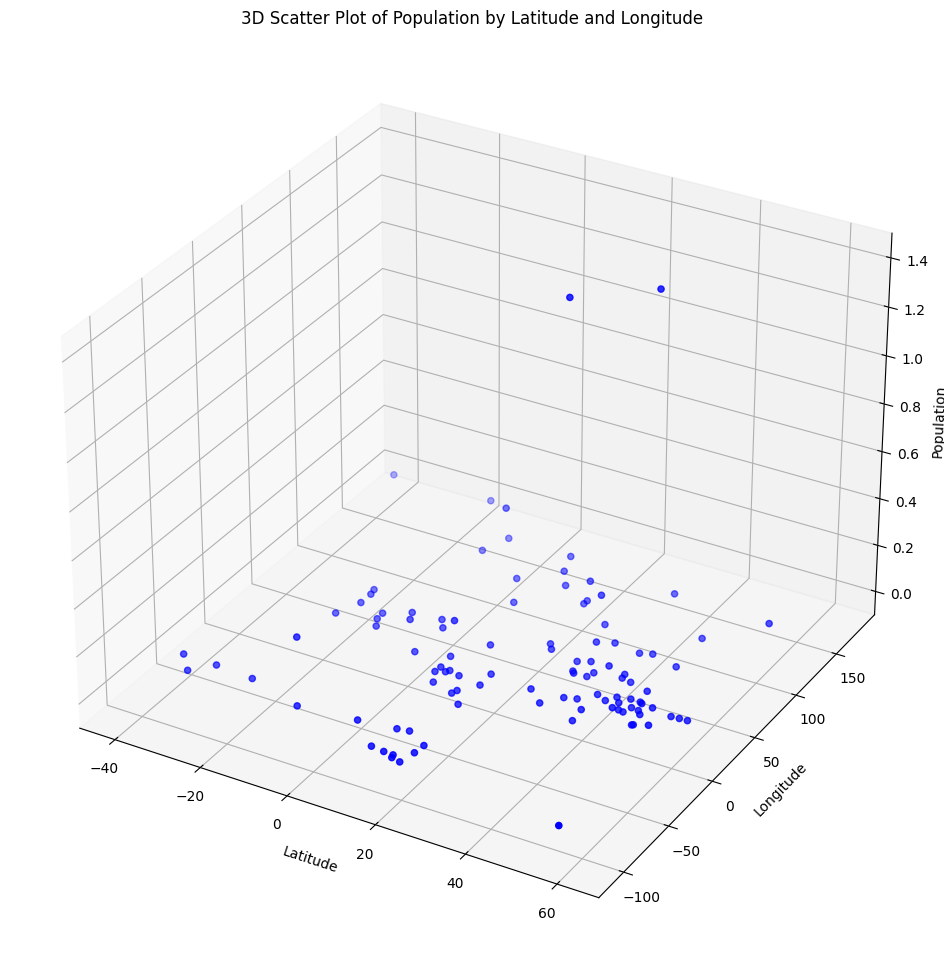

In [80]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12-))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Latitude'], df['Longitude'], df['Population'], c='b', marker='o')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Population')
ax.set_title('3D Scatter Plot of Population by Latitude and Longitude')
plt.show()


Observations:

Northern Hemisphere: The majority of data points are concentrated in the Northern Hemisphere, particularly in the mid-latitudes.

Southern Hemisphere: There are fewer data points in the Southern Hemisphere, and they are more scattered.

Coastal Regions: There seems to be a concentration of data points near coastal areas, suggesting that coastal regions may have higher population densities.

Outliers: A few data points appear to be outliers, potentially representing regions with extremely high or low population densities.

In [28]:
# Limit the number of countries to 20 for clarity
df_top = df.nlargest(20, 'Population')

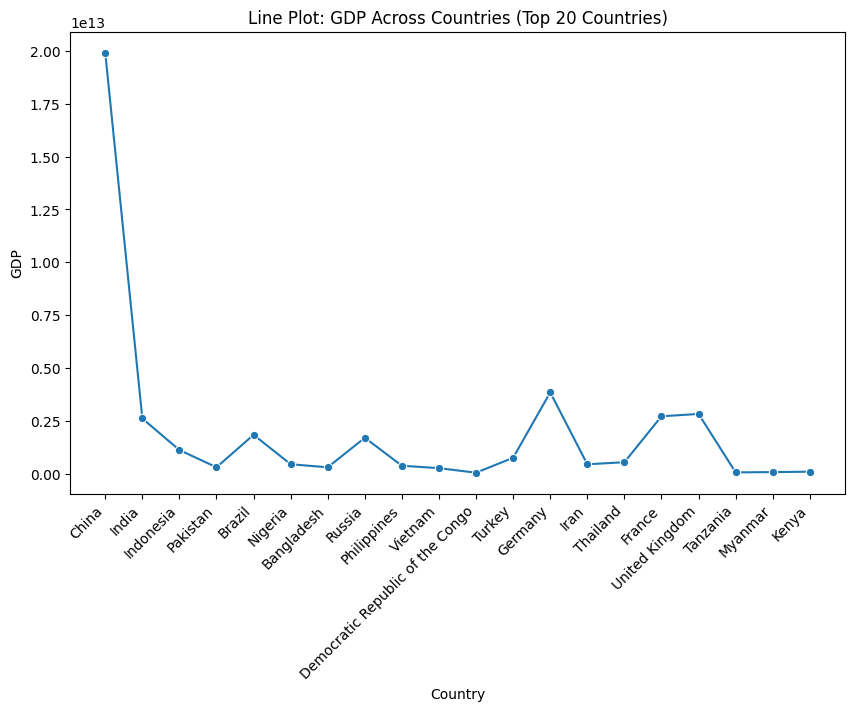

In [36]:
#Line Plot for GDP Over Countries
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top, x='Country', y='GDP', marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('Line Plot: GDP Across Countries (Top 20 Countries)')
plt.show()

Observations:

Wide Range of GDP: The plot shows a significant variation in GDP across the top 20 countries, ranging from very high to very low.

Dominance of China and India: China and India, the two most populous countries, have the highest GDPs by a considerable margin.

Clustering: Some countries, such as Indonesia, Pakistan, Nigeria, and Brazil, appear to form a cluster with similar GDP levels.

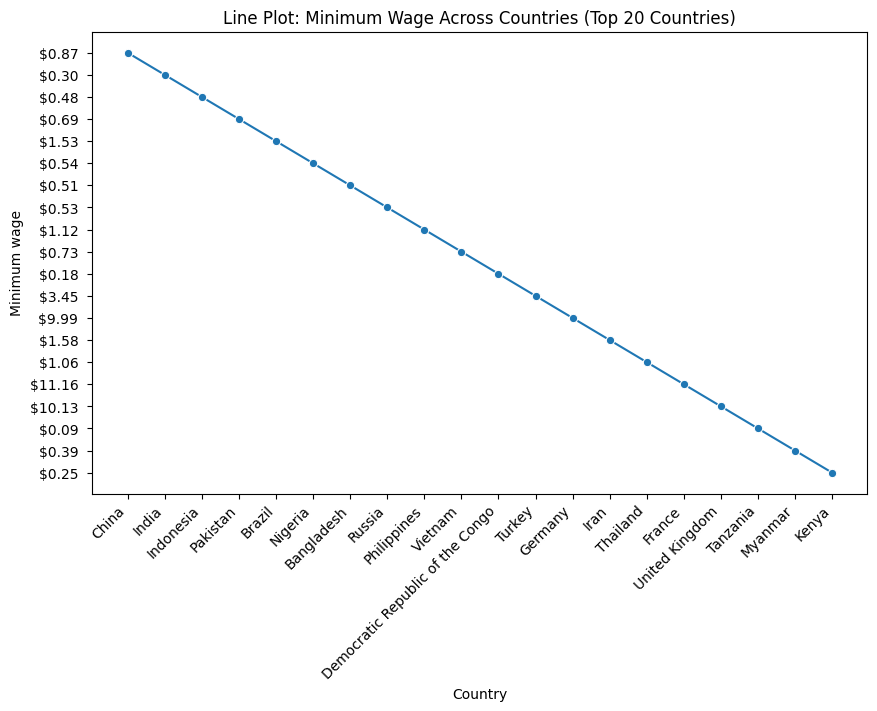

In [37]:
#Line Plot for Minimum Wages Over Countries
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top, x='Country', y='Minimum wage', marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('Line Plot: Minimum Wage Across Countries (Top 20 Countries)')
plt.show()


 Observations:

Minimum Wage Disparity: The gap between the highest and lowest minimum wages is substantial, highlighting the global inequality in labor standards.

Emerging Economies: Several emerging economies, such as China and India, have relatively low minimum wages compared to developed countries.

Regional Variations: The plot shows regional variations in minimum wage. For example, countries in Europe and North America tend to have higher minimum wages compared to those in Asia and Africa.

<Figure size 1000x600 with 0 Axes>

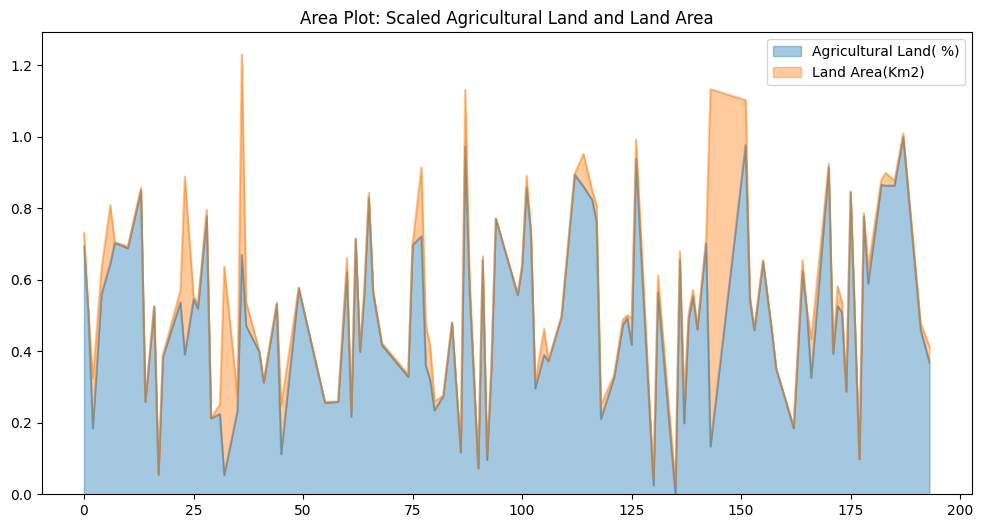

In [52]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the relevant data
df_scaled = df[['Agricultural Land( %)', 'Land Area(Km2)']].copy()

# Initialize MinMaxScaler to scale the data between 0 and 1
scaler = MinMaxScaler()

# Apply scaling
df_scaled[['Agricultural Land( %)', 'Land Area(Km2)']] = scaler.fit_transform(df_scaled)

# Plot the area chart
plt.figure(figsize=(10, 6))
df_scaled.plot(kind='area', alpha=0.4, figsize=(12, 6))
plt.title('Area Plot: Scaled Agricultural Land and Land Area')
plt.show()


Observation:

Fluctuations: The plot shows significant fluctuations in both Agricultural Land (%) and Land Area (Km²) across different countries. This indicates that the distribution of agricultural land as a percentage and land area in square kilometers varies widely between countries.

Dominance of Land Area: In some regions, the Land Area (Km²) (orange peaks) significantly overshadows the Agricultural Land (%) (blue area). This implies that even though a country might have a large land area, the portion of that land used for agriculture could be relatively small.

Peaks and Troughs: There are sharp peaks and deep troughs for both variables. For example, around index 150, we see a sudden surge in land area but a drop in agricultural land percentage. This could represent a country with a vast area of land but with a smaller portion allocated for agriculture.

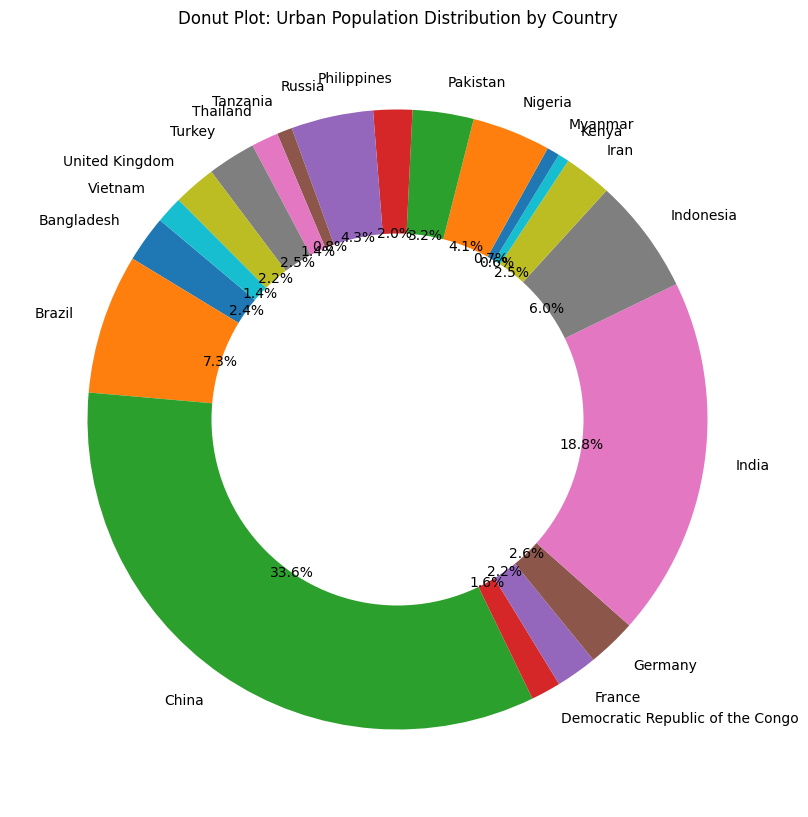

In [89]:
# Donut chart using Urban Population by Country
plt.figure(figsize=(10, 24))
urban_population = df_top.groupby('Country')['Urban_population'].sum()

# Create a pie chart and make it a donut by adjusting the center radius
plt.pie(urban_population, labels=urban_population.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Donut Plot: Urban Population Distribution by Country')
plt.show()


Observations:

Dominance of China and India: China and India, the two most populous countries in the world, have the highest urban populations, with 33.6% and 18.8% respectively.

Regional Variations: There are noticeable regional variations in urban population distribution. Countries in Asia, particularly East Asia and South Asia, have higher urban populations compared to countries in Africa and Latin America.

Emerging Economies: Several emerging economies, such as Indonesia, Brazil, and Nigeria, have significant urban populations, indicating rapid urbanization in these regions.

In [57]:
!pip install squarify


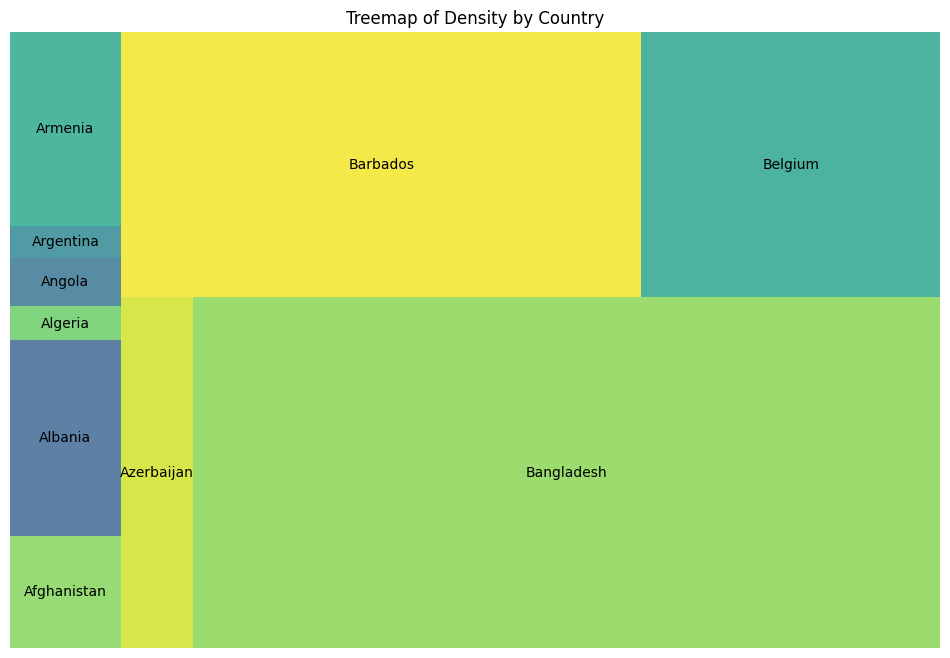

In [58]:
import squarify

plt.figure(figsize=(12, 8))
sizes = df['Density\n(P/Km2)'].head(10)  # Top 10 for example
labels = df['Country'].head(10)
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.title('Treemap of Density by Country')
plt.axis('off')
plt.show()


Observations:

High-Density Countries: Bangladesh and Belgium, both located in Asia, appear to have the highest population densities.

Low-Density Countries: Armenia, Albania, and Azerbaijan, located in the Caucasus region, seem to have lower population densities.

Regional Variations: There may be regional differences in population density, as evidenced by the clustering of countries with similar colors and sizes.

In [64]:
import plotly.express as px

# Sort data by Gross Primary Education Enrollment (%) for top 10 countries
funnel_data = df.sort_values(by='Gross primary education enrollment (%)', ascending=False).head(10)

# Create the funnel chart
fig = px.funnel(funnel_data,
                x='Gross primary education enrollment (%)',
                y='Country',
                title='Funnel Plot: Gross Primary Education Enrollment (%) by Country')

fig.show()


Observations:

Top Countries: Slovakia has the highest enrollment rate at 99.80%, followed by Latvia and Ukraine.

Lower Enrollment: Saudi Arabia, Azerbaijan, Greece, and Thailand have slightly lower enrollment rates, but they are still above 99%.

Variations: There are variations in enrollment rates among the countries, even though they are all relatively high.